# Assignment 1
Distributions, Moments, and the Cental Limit Theorem

In [183]:
from __future__ import print_function
__author__ = 'hbk'

import pylab as pl
import numpy as np
%pylab inline

## importing style file from federika's repo
# import json
# import os
# s = json.load( open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
# pl.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


## Creating test distributions with sample sizes of 100 and population means of 100:

In [184]:
mymean = 100
distributions = {} # creating empty dictionary
# normal dist
distributions['normal'] = np.random.normal(mymean,100,100) # ([loc, scale, size])
# poisson
distributions['poisson'] = np.random.poisson(mymean,100) # ([lam, size])
# binomial
distributions['binom'] = np.random.binomial(200,0.5,100) # (n, p[, size])
# chisq
distributions['chisq'] = np.random.chisquare(mymean,100) # (df[, size])
# choice 1
distributions['geom'] = np.random.geometric(0.01,100) # (p[, size])
# choice 2
distributions['laplace'] = np.random.laplace(mymean,100,100) # ([loc, scale, size])

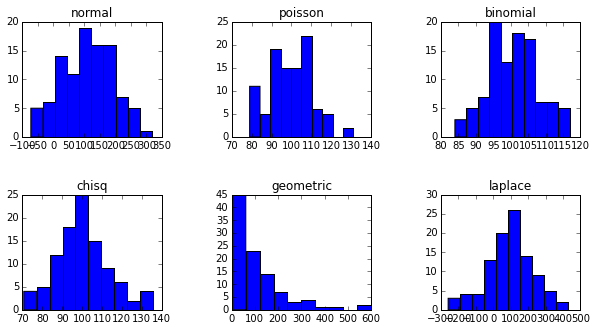

In [185]:
pl.figure(figsize=(10,5))

pl.subplot(2,3,1)
pl.hist(distributions['normal'])
pl.title('normal')

pl.subplot(232)
pl.hist(distributions['poisson'])
pl.title('poisson')

pl.subplot(233)
pl.hist(distributions['binom'])
pl.title('binomial')

pl.subplot(234)
pl.hist(distributions['chisq'])
pl.title('chisq')

pl.subplot(235)
pl.hist(distributions['geom'])
pl.title('geometric')

pl.subplot(236)
pl.hist(distributions['laplace'])
pl.title('laplace')

pl.subplots_adjust(wspace=0.5,hspace=0.5,
                  left=0.125, right=0.9,
                  top=0.9, bottom=0.1)

In [186]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(distributions['normal'].mean(), distributions['normal'].std()))
print (' ')
print ("Poisson mean: %.2f, standard deviation: %.2f"%(distributions['poisson'].mean(), distributions['poisson'].std()))
print (' ')
print ("Binomial mean: %.2f, standard deviation: %.2f"%(distributions['binom'].mean(), distributions['binom'].std()))
print (' ')
print ("Chi Squared mean: %.2f, standard deviation: %.2f"%(distributions['chisq'].mean(), distributions['chisq'].std()))
print (' ')
print ("Geometric mean: %.2f, standard deviation: %.2f"%(distributions['geom'].mean(), distributions['geom'].std()))
print (' ')
print ("LaPlace mean: %.2f, standard deviation: %.2f"%(distributions['laplace'].mean(), distributions['laplace'].std()))

Normal mean: 110.00, standard deviation: 81.67
 
Poisson mean: 99.58, standard deviation: 10.62
 
Binomial mean: 100.74, standard deviation: 7.14
 
Chi Squared mean: 100.00, standard deviation: 13.16
 
Geometric mean: 107.57, standard deviation: 116.70
 
LaPlace mean: 97.67, standard deviation: 131.02


## Creating array of 100 numbers that will be used as the sample sizes for each of the distributions:

In [187]:
mysize=1000/(np.array(range(1,100)+[10])) # can't add directly to a range, can only add another list

In [188]:
print (mysize, mysize.shape)

[1000  500  333  250  200  166  142  125  111  100   90   83   76   71   66
   62   58   55   52   50   47   45   43   41   40   38   37   35   34   33
   32   31   30   29   28   27   27   26   25   25   24   23   23   22   22
   21   21   20   20   20   19   19   18   18   18   17   17   17   16   16
   16   16   15   15   15   15   14   14   14   14   14   13   13   13   13
   13   12   12   12   12   12   12   12   11   11   11   11   11   11   11
   10   10   10   10   10   10   10   10   10  100] (100,)


## Creating samples of each distribution that all have the same population mean by plugging in each 'n' from the number array for the sample size and 'mymean' (=100):

In [189]:
distributions['normal'] = {}
for n in mysize:
    distributions['normal'][n] = np.random.normal(mymean,100,n) # ([loc, scale, size])   
    
distributions['poisson'] = {}
for n in mysize:
    distributions['poisson'][n] = np.random.poisson(mymean,n) # ([lam, size])

distributions['binom'] = {}
for n in mysize:
    distributions['binom'][n] = np.random.binomial(200,0.5,n) # (n, p[, size]) 

distributions['chisq'] = {}
for n in mysize:
    distributions['chisq'][n] = np.random.chisquare(mymean,n)  # (df[, size]) df=mean  

distributions['geom'] = {}
for n in mysize:
    distributions['geom'][n] = np.random.geometric(0.01,n) # (p[, size])
    
distributions['laplace'] = {}
for n in mysize:
    distributions['laplace'][n] = np.random.laplace(mymean,100,n) # ([loc, scale, size])  


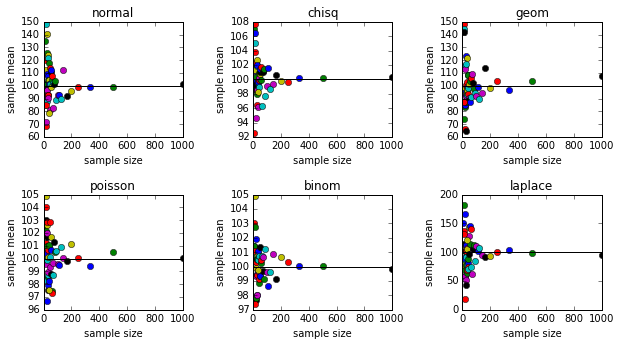

In [192]:
means = {}
means['normal'] = {}
means['laplace'] = {}
means['poisson'] = {}
means['binom'] = {}
means['chisq'] = {}
means['geom'] = {}

fig_mu_N = pl.figure(figsize=(10,5))
counter = 0
for mydist in distributions:
    counter += 1
    axchisq_mu_N = fig_mu_N.add_subplot(2,3,counter)
    for nn in distributions[mydist]: 
        # don't need to include .iterkeys() but can - works same way
        # calculating and filling in mean values
        means[mydist][nn] = distributions[mydist][nn].mean()
        # now plotting those values
        axchisq_mu_N.plot(nn, distributions[mydist][nn].mean(), 'o')
        axchisq_mu_N.set_xlabel('sample size')
        axchisq_mu_N.set_ylabel('sample mean')
        axchisq_mu_N.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')
    axchisq_mu_N.set_title(mydist)
    
pl.subplots_adjust(wspace=0.5,hspace=0.5,
                  left=0.125, right=0.9,
                  top=0.9, bottom=0.1)

## Note: In plots from all the distribution types shown above, as the sample size increases, the population mean gets closer to 100.

## Now here is a histogram showing the distribution of all sample means from all the distribution types:

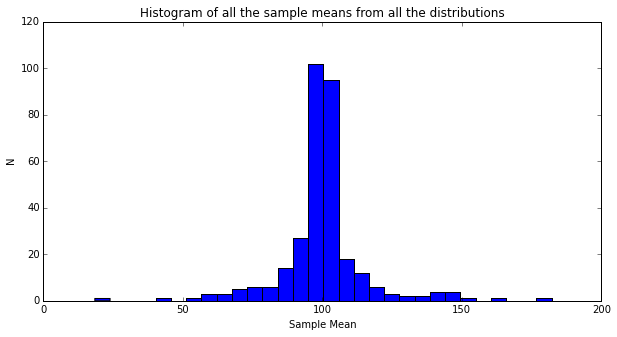

In [191]:
allmeans = []

for mydist in means:
    for n in means[mydist]:
        allmeans.append(means[mydist][n])

pl.figure(figsize=(10,5))
pl.hist(allmeans,bins=30)
pl.xlabel('Sample Mean')
pl.ylabel('N')
pl.title('Histogram of all the sample means from all the distributions')